In [42]:
import time
import os
import datetime     ## đã cai dat san~
import numpy as np
import pandas as pd
import seaborn as sns  ## pip install seaborn
import matplotlib.pyplot as plt

from datetime import datetime, time

## Phần 1. (Chapter 11. Financial and Economic Data Applications).

### 1.1. Các bài toán liên quan đến chuỗi thời gian.
Một trong các bài toán kinh điển mà các ngành tài chính, thống kê quan tâm đến là các bài toán liên quan đến chuỗi thời gian. Hiểu một cách đơn giản, bài toán liên quan đến chuỗi thời gian là bài toán được gắn các `nhãn thời gian (timestamp)` hay `chỉ số thời gian`.

Trong thực tế, ta sẽ gặp rất nhiều mô hình như vậy, chẳng hạn
- Quan sát giao dịch của một loại cổ phiếu theo thời gian để phân tích giá cổ phiếu
- Quan sát nhiệt độ, lượng mưa của một khu vực nào đó.
- Quan sát số khách hàng đến mua sắm tại một khu trung tâm thương mại,
- etc.

Như vậy, đối với một người làm phân tích dữ liệu khi gặp phải `BT chuỗi thời gian` thì việc kiểm soát được các biến số liên quan đến thời gian sẽ giúp họ thu thập thông tin chính xác hơn (chẳng hạn như nếu người ta chỉ muốn quan tâm đến lượng tiêu thụ của áo len, một mặt hàng vốn chỉ được bán chạy trong mùa thu-đông và hầu như không có ý nghĩa khi quan sát trong khoảng thời gian còn lại).

Không nói nhiều nữa, bây giờ ta sẽ bắt đầu bài toán với dữ liệu `jena-climate.csv`, đây là dữ liệu được một đài khí tượng của Đức ghi lại trong khoảng thời gian từ 2009 đến 2016. Dữ liệu này có các cột cơ bản (và tiêu biểu) như sau:
- `Date Time`: nhãn thời gian
- `T(degC)`: nhiệt độ được đo bằng thang `Celcius`.
- `Tpot(K)`: nhiệt độ được đo bằng độ `K`.
- `p(mbar)`: áp suất khí quyển
- ....

In [43]:
#path_file = r"E:\Tram\jena_climate_2009_2016.csv"
path_file = r'../input/temperatureforecasting/jena_climate_2009_2016.csv'
df = pd.read_csv(path_file)

## Lấy 180000 quan trắc đầu tiên trong dữ liệu
df = df.head(180000)
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


Một trong những thao tác xử lý về biến thời gian là làm sao lấy được thông tin cụ thể về dữ liệu theo các đối tượng cụ thể như `ngày, tháng, năm`.

#### 1.1.1. Lấy thông tin `day, week, year` từ `timestamp`
Ta thấy rằng trong dữ liệu này, các chỉ số thời gian được lưu dưới dạng 
            
            dd.mm.yyyy HH:MM:SS
            tức là
            (day.month.year hour:minute:second)

trong đó
- ngày, tháng, năm được cách nhau bởi dấu chấm (`.`)
- giờ, phút, giây cách nhau bởi hai chấm (`:`).

nhưng một chỉ số thời gian tiêu chuẩn sẽ được lưu dưới dạng

          yyyy-mm-dd HH:MM:SS
          
trong đó
- thứ tự đầu tiên phải là `năm-tháng-ngày` cách nhau bởi dấu nối ngang (`-`)
- thứ tự còn lại là `giờ phút giây` như trên

Vì vậy, để trích ra giá trị ngày, tháng, năm cụ thể từ một chỉ số thời gian cho trước (trong Python ta sẽ thực hiện nó qua thư viện `datetime`) thì trước tiên ta phải quy đổi định dạng nó về dạng tiêu chuẩn, với cú pháp

                            datetime.strptime(x, "%d.%m.%Y %H:%M:%S")

In [44]:
## Tao dataframe moi voi ten new_df
new_df = pd.DataFrame({'Given timestamp': df['Date Time']})

## them cot datetime voi dinh nghia tu "Date Time" trong data cu~ va chuyen dinh dang cua no ve dang tieu chuan
new_df['datetime'] = df['Date Time'].apply(lambda x: datetime.strptime(x, "%d.%m.%Y %H:%M:%S"))

## Thêm cột nhiệt độ
new_df['temp_C'] = df['T (degC)']
new_df.head()

,Given timestamp,datetime,temp_C
0,01.01.2009 00:10:00,2009-01-01 00:10:00,-8.02
1,01.01.2009 00:20:00,2009-01-01 00:20:00,-8.41
2,01.01.2009 00:30:00,2009-01-01 00:30:00,-8.51
3,01.01.2009 00:40:00,2009-01-01 00:40:00,-8.31
4,01.01.2009 00:50:00,2009-01-01 00:50:00,-8.27


#### Bài toán 1. Thử viết một `function` để vẽ biểu đồ nhiệt độ với các `input` là `"dataframe", "tháng", "năm"`, chẳng hạn như trong tháng 1 năm 2009.

Lưu ý rằng trong hàm này, ta giả sử rằng đã biết được chính xác cột nào chứa thời gian từ dữ liệu gốc, `datetime`.

**Bước 1. Tạo thêm các cột `ngày`, `tháng`, `năm`**

In [45]:
new_df['year'] = new_df['datetime'].apply(lambda x : x.year)
new_df['month'] = new_df['datetime'].apply(lambda x : x.month)
new_df['day'] = new_df['datetime'].apply(lambda x : x.day)
new_df.head()

,Given timestamp,datetime,temp_C,year,month,day
0,01.01.2009 00:10:00,2009-01-01 00:10:00,-8.02,2009,1,1
1,01.01.2009 00:20:00,2009-01-01 00:20:00,-8.41,2009,1,1
2,01.01.2009 00:30:00,2009-01-01 00:30:00,-8.51,2009,1,1
3,01.01.2009 00:40:00,2009-01-01 00:40:00,-8.31,2009,1,1
4,01.01.2009 00:50:00,2009-01-01 00:50:00,-8.27,2009,1,1


#### Bước 2. Vẽ biểu đồ đường thể hiện nhiệt độ trong tháng 1 năm 2009

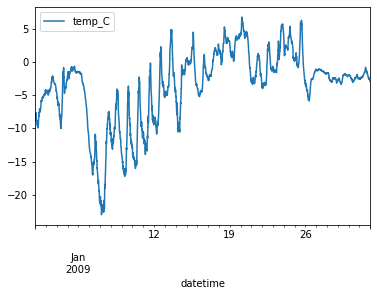

In [46]:
## Lọc thông tin chỉ chứa tháng và năm
jan_df = new_df[(new_df['month'] == 1) & (new_df['year'] == 2009)]

## Đánh chi so theo thoi gian
jan_df = jan_df.set_index('datetime')

## Ve bieu do nhiet
jan_df.plot(y = 'temp_C')

#### Bước 3. Viết hàm.
Từ những gì đã làm trong 2 bước trên, giờ ghép tất cả lại vào một `function` và đặt tên hàm là `show_temp_date`

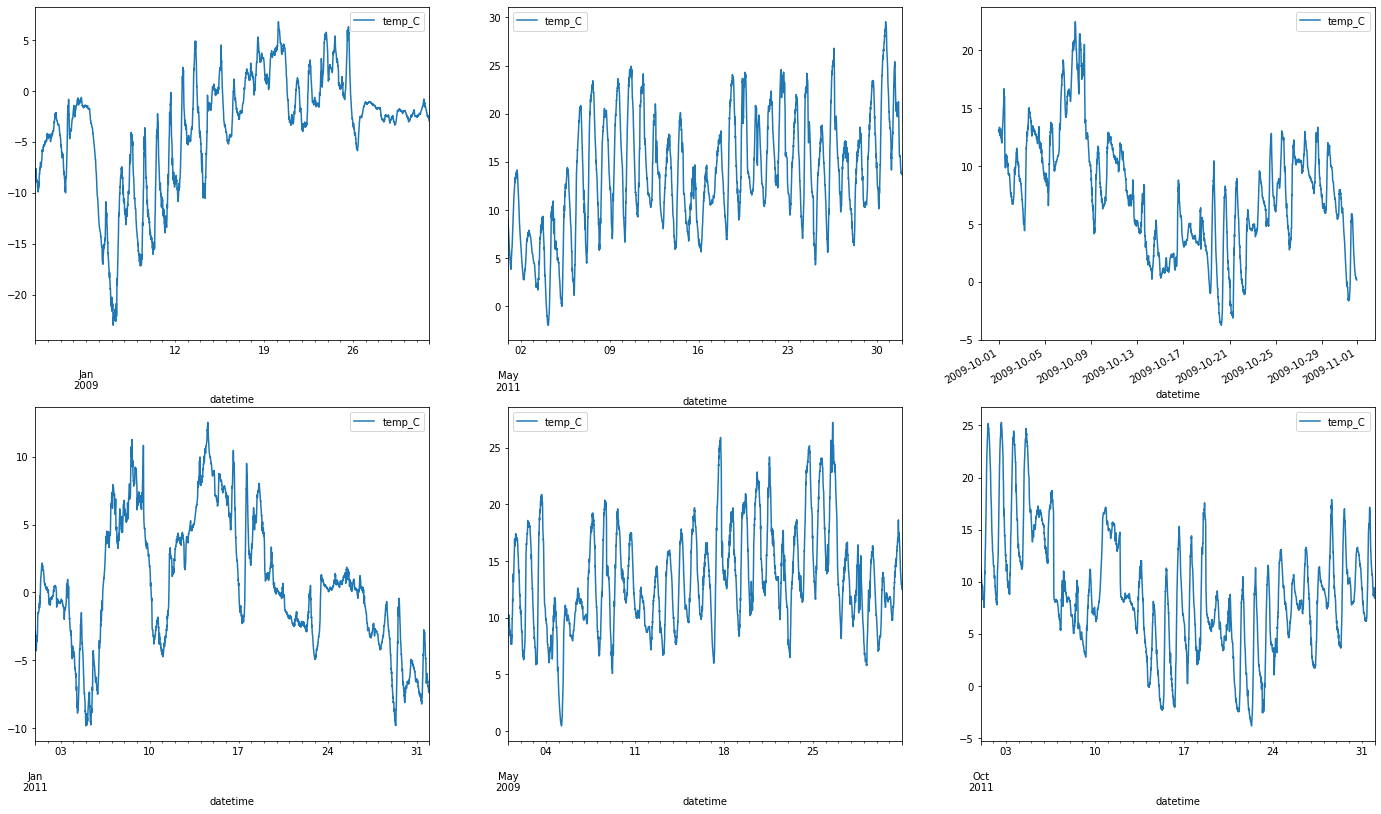

In [47]:
def show_temp_date(dataframe, month, year):
    """
        Input params:
            dataframe (dataframe)
            month, year (list of int): tháng & năm muốn hiển thị
        Returns: graph of temperature
    """
    new_df = dataframe
    new_df['year'] = new_df['datetime'].apply(lambda x : x.year)
    new_df['month'] = new_df['datetime'].apply(lambda x : x.month)
    nr, nc = len(year), len(month)  
    fig, ax = plt.subplots(nrows = nr, ncols = nc, figsize = (24, 15))
    ax = ax.ravel()  ## dua ve 1 chieu
    for k in range(nr*nc):
        sub_df = new_df[(new_df['month'] == month[k % nc]) & (new_df['year'] == year[k % nr])]
        sub_df = sub_df.set_index('datetime')
        sub_df.plot(y = 'temp_C', ax = ax[k])
        
show_temp_date(new_df, [1, 5, 10], [2009, 2011])

#### Bài toán 2. Viết hàm và trả lời câu hỏi "trong năm 2009, tháng nào có biên độ nhiệt cao nhất, thấp nhất?"

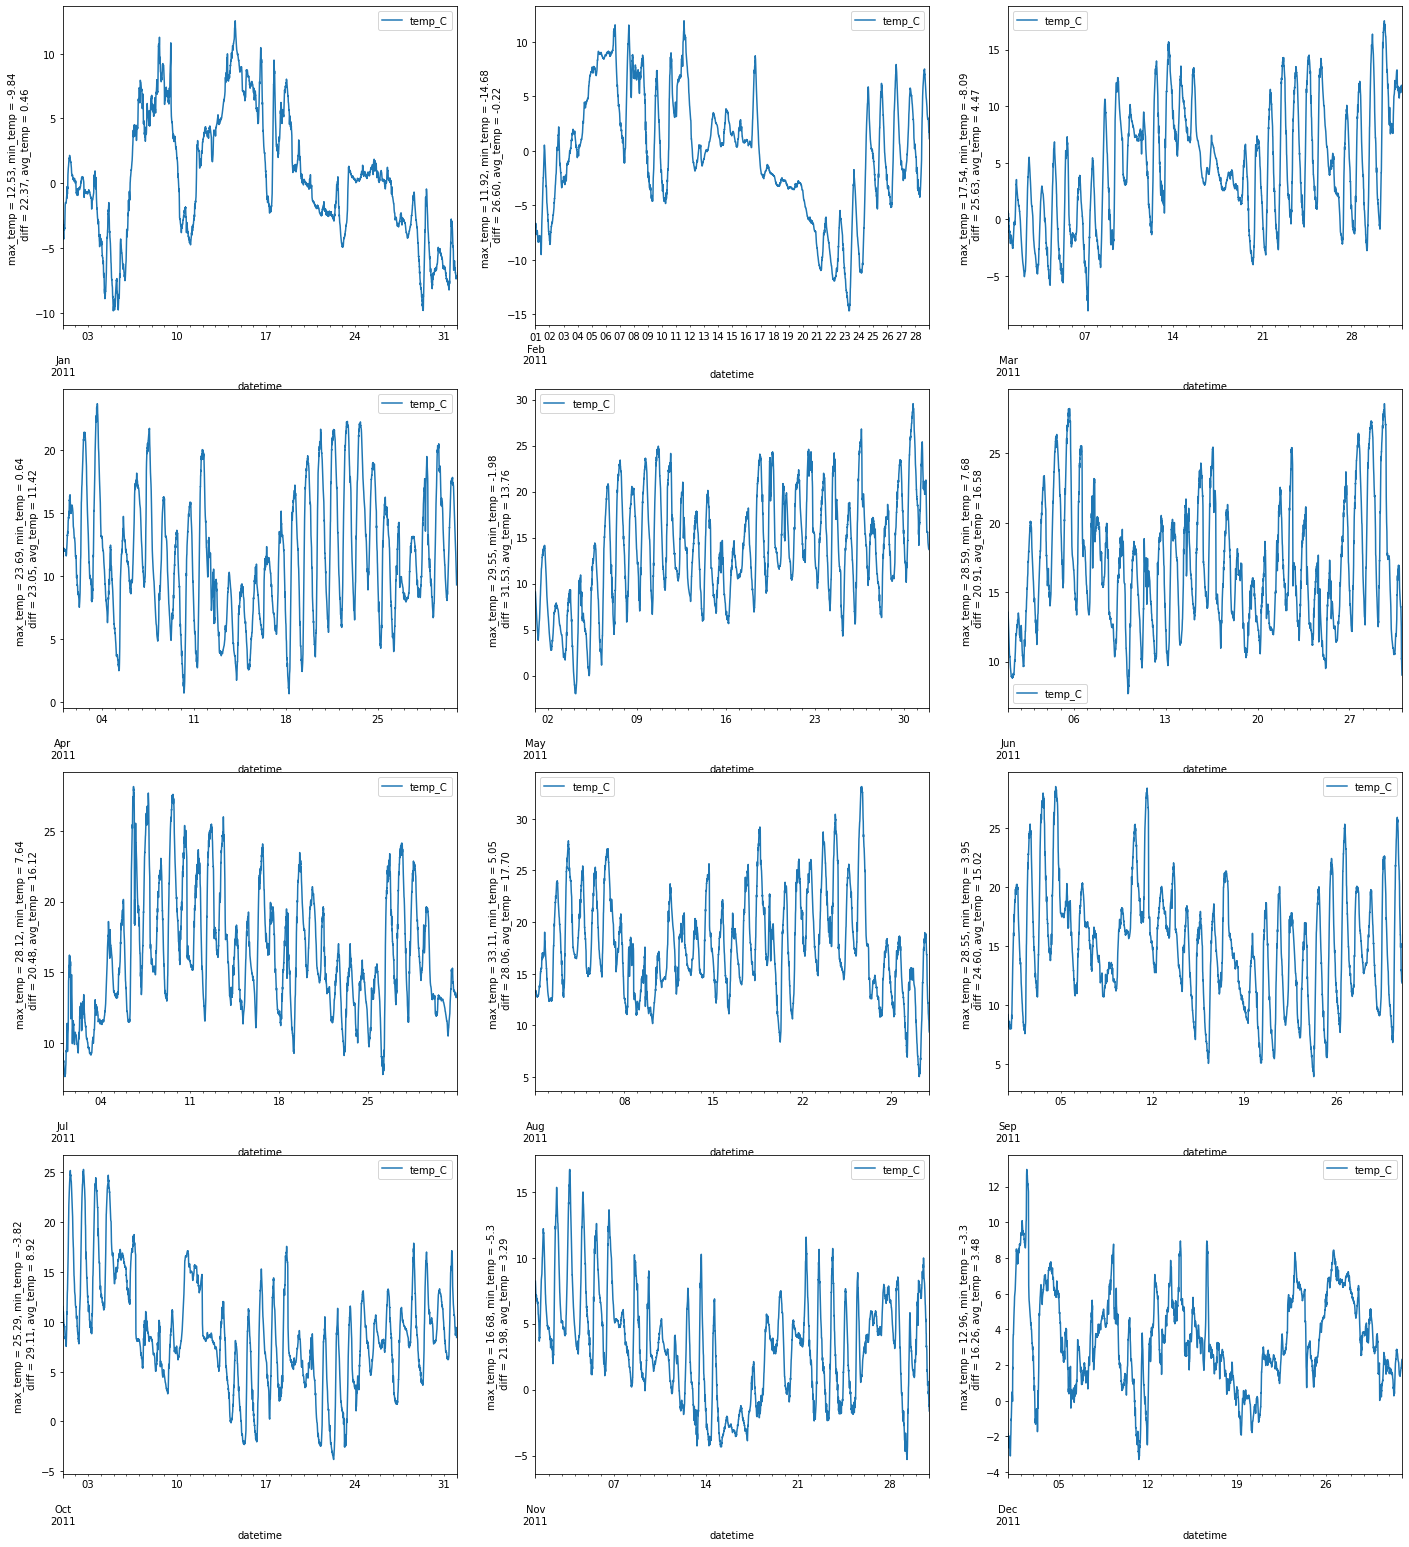

In [48]:
def show_temp_year(dataframe, year):
    """
        Input params:
            dataframe (dataframe)
            year (int): năm muốn hiển thị
        Returns: graph of temperature of the months of a year
    """
    new_df = dataframe
    new_df['year'] = new_df['datetime'].apply(lambda x : x.year)
    new_df['month'] = new_df['datetime'].apply(lambda x : x.month)
    fig, ax = plt.subplots(nrows = 4, ncols = 3, figsize = (24, 27))
    ax = ax.ravel()
    for k in range(12):
        sub_df = new_df[(new_df['month'] == k+1) & (new_df['year'] == year)]
        sub_df = sub_df.set_index('datetime')
        sub_df.plot(y = 'temp_C', ax = ax[k])
        ax[k].set_ylabel('max_temp = %s, min_temp = %s \n diff = %.2f, avg_temp = %.2f'%
                        (sub_df['temp_C'].max(), sub_df['temp_C'].min(), \
                          sub_df['temp_C'].max() - sub_df['temp_C'].min(), sub_df['temp_C'].mean()))
        
show_temp_year(new_df, 2011)

Như vậy, nhìn vào chú thích bên trục tung,
- Tháng 5/2011 có biên độ nhiệt cao nhất 31.53 với ngưỡng dao động từ -1.98 đến 29.55. Vì thời điểm này ở phương Tây là giai đoạn giao mùa từ xuân sang hạ nên có biên độ nhiệt khá cao.
- Tháng 12/2011 có biên độ nhiệt thấp nhất vì đây là thời điểm vào đông.
- Tháng có nhiệt độ cao nhất là tháng 8 với thời điểm đạt `33.11 degC`, thấp nhất là tháng 2 với ngưỡng `-14.68 degC`
- Tháng có trung bình nhiệt cao nhất là tháng 8 với `17.7 degC`, thấp nhất là tháng 2 với `-0.22 degC`

### Mở rộng! Liệu có cách nào để tính trung bình, max, min về nhiệt của các tháng mà không cần tạo thêm cột hay không? 

#### Suggested Solution: `df.resample`

Xem ví dụ sau đây, đầu tiên, ta sẽ tạo một `Series` chứa thông tin về `temp_C` với index được lấy từ `datetime`

In [49]:
temp_C = new_df.set_index('datetime').temp_C
temp_C.head()

datetime
2009-01-01 00:10:00   -8.02
2009-01-01 00:20:00   -8.41
2009-01-01 00:30:00   -8.51
2009-01-01 00:40:00   -8.31
2009-01-01 00:50:00   -8.27
Name: temp_C, dtype: float64

Bây giờ, áp dụng `.resample('1M')` ví dụ như ta muốn in ra kết quả về max, min và mean của 12 tháng (trong năm 2011), ta sẽ thực hiện như sau

In [50]:
print(temp_C.resample('1M').mean()[24:36])   ## trung bình nhiệt theo tháng
print(20*'-*')
print(temp_C.resample('1M').min()[24:36])    ## nhiệt độ cao nhất theo tháng  
print(20*'-*')
print(temp_C.resample('1M').max()[24:36])    ## nhiệt độ thấp nhất theo tháng
print(20*'-*')
print(temp_C.resample('1M').max()[24:36] - temp_C.resample('1M').min()[24:36])  ## biên độ nhiệt theo tháng

datetime
2011-01-31     0.464084
2011-02-28    -0.220030
2011-03-31     4.473770
2011-04-30    11.423347
2011-05-31    13.763833
2011-06-30    16.575123
2011-07-31    16.116826
2011-08-31    17.704386
2011-09-30    15.023215
2011-10-31     8.919534
2011-11-30     3.292178
2011-12-31     3.482525
Freq: M, Name: temp_C, dtype: float64
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
datetime
2011-01-31    -9.84
2011-02-28   -14.68
2011-03-31    -8.09
2011-04-30     0.64
2011-05-31    -1.98
2011-06-30     7.68
2011-07-31     7.64
2011-08-31     5.05
2011-09-30     3.95
2011-10-31    -3.82
2011-11-30    -5.30
2011-12-31    -3.30
Freq: M, Name: temp_C, dtype: float64
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
datetime
2011-01-31    12.53
2011-02-28    11.92
2011-03-31    17.54
2011-04-30    23.69
2011-05-31    29.55
2011-06-30    28.59
2011-07-31    28.12
2011-08-31    33.11
2011-09-30    28.55
2011-10-31    25.29
2011-11-30    16.68
2011-12-31    12.96
Freq: M, Name: temp_C, dtype: float64
-*-*-*-*-

### Comments.
- Phương thức `.resample('M)` cho kết quả nhanh hơn về các giá trị thống kê cơ bản (`max, min, mean, diff`) như khi quan sát nhiệt độ trong tháng so với những gì ta đã giải ở Bài toán 2. Đây là một ưu điểm khi không cần tạo thêm cột để thực hiện khảo sát và tính toán các giá trị thống kê này, cũng như chính xác về thời điểm nó đạt `max, min` về nhiệt.
- Tuy nhiên, phương thức này không thấy được sự liên tục và trend của nhiệt độ theo thời gian như ta đã giải ở bài toán 2

#### 1.1.2. Cắt dữ liệu theo nhóm các quan trắc về `weekday`.
Cũng tương tự như phần trước, để
- lấy thông tin về `giờ (hour)` từ giá trị `datetime` ta sẽ dùng `.hour`
- tương tự cho phút và giây
- cho các ngày trong tuần, `.weekday`

#### Bài toán 3. Hãy viết 1 hàm để xác định một `input = datetime` là ngày thứ mấy trong tuần. Sau đó, cho biết các quan trắc đó xuất hiện bao nhiêu lần trong `new_df`

In [51]:
def data_and_weekday(dataframe):
    new_df = dataframe
    wd = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    new_df['dow'] = new_df['datetime'].apply(lambda x: wd[x.weekday()])
    
    return new_df
dow_df = data_and_weekday(new_df)
dow_df.head(10)

,Given timestamp,datetime,temp_C,year,month,day,dow
0,01.01.2009 00:10:00,2009-01-01 00:10:00,-8.02,2009,1,1,Thu
1,01.01.2009 00:20:00,2009-01-01 00:20:00,-8.41,2009,1,1,Thu
2,01.01.2009 00:30:00,2009-01-01 00:30:00,-8.51,2009,1,1,Thu
3,01.01.2009 00:40:00,2009-01-01 00:40:00,-8.31,2009,1,1,Thu
4,01.01.2009 00:50:00,2009-01-01 00:50:00,-8.27,2009,1,1,Thu
5,01.01.2009 01:00:00,2009-01-01 01:00:00,-8.05,2009,1,1,Thu
6,01.01.2009 01:10:00,2009-01-01 01:10:00,-7.62,2009,1,1,Thu
7,01.01.2009 01:20:00,2009-01-01 01:20:00,-7.62,2009,1,1,Thu
8,01.01.2009 01:30:00,2009-01-01 01:30:00,-7.91,2009,1,1,Thu
9,01.01.2009 01:40:00,2009-01-01 01:40:00,-8.43,2009,1,1,Thu


Sau đây, đếm các `thứ trong tuần (day of week)` đã xuất hiện trong 180000 quan trắc đầu tiên.

In [52]:
dow_df['dow'].value_counts()

Thu    25916
Fri    25777
Sat    25776
Sun    25635
Mon    25632
Tue    25632
Wed    25632
Name: dow, dtype: int64

#### 1.1.3. Lấy mẫu bằng cách bỏ qua một vài nhãn thời gian, ví dụ, lấy mẫu cách 3 ngày từ một data.

Để tránh những câu hỏi xàm khi thuyết trình, phần [`1.1.3`]() này được trích trong trang `332-334` sách giáo trình [`Python for Data Analysis`]() nhưng không sao chép nguyên văn mà trình bày theo ý riêng của tác giả.

Trong `Python`, để phát sinh chuỗi thời gian với quy luật nào đó, như cách bao nhiêu ngày, ta sẽ thực hiện với cú pháp sau:

                pd.date_range(starting_date, periods = numbers_of_days, freq = types_of_freq)
hoặc                
    
                pd.date_range(ending_date, periods = numbers_of_days, freq = types_of_freq)                
Ví dụ, `freq = "W-WED"` cách tuần với thời điểm đầu là ngày `13/06/2012`

In [53]:
pd.date_range(start = '2012-06-13', periods=3, freq='W-WED')

DatetimeIndex(['2012-06-13', '2012-06-20', '2012-06-27'], dtype='datetime64[ns]', freq='W-WED')

**`freq` = `week`**

In [54]:
pd.date_range(end = '2012-6-13', periods=3, freq='W-WED')

DatetimeIndex(['2012-05-30', '2012-06-06', '2012-06-13'], dtype='datetime64[ns]', freq='W-WED')

**`freq` = 5hours**

In [55]:
pd.date_range('2012-6-13', periods=3, freq='5H')

DatetimeIndex(['2012-06-13 00:00:00', '2012-06-13 05:00:00',
               '2012-06-13 10:00:00'],
              dtype='datetime64[ns]', freq='5H')

In [56]:
pd.date_range('2012-6-13', periods=3, freq='5M')

DatetimeIndex(['2012-06-30', '2012-11-30', '2013-04-30'], dtype='datetime64[ns]', freq='5M')

#### Bây giờ, lấy mẫu dữ liệu trong `new_df` với quy luật nửa năm.

In [57]:
dates_6M = pd.date_range(start = new_df['datetime'][0], periods = 7, freq = '6M')
dates_6M

DatetimeIndex(['2009-01-31 00:10:00', '2009-07-31 00:10:00',
               '2010-01-31 00:10:00', '2010-07-31 00:10:00',
               '2011-01-31 00:10:00', '2011-07-31 00:10:00',
               '2012-01-31 00:10:00'],
              dtype='datetime64[ns]', freq='6M')

In [58]:
mask = [datetime in dates_6M for datetime in new_df['datetime']]
df_6M = new_df[mask]
df_6M

,Given timestamp,datetime,temp_C,year,month,day,dow
4320,31.01.2009 00:10:00,2009-01-31 00:10:00,-2.50,2009,1,31,Sat
30384,31.07.2009 00:10:00,2009-07-31 00:10:00,13.66,2009,7,31,Fri
56878,31.01.2010 00:10:00,2010-01-31 00:10:00,-4.18,2010,1,31,Sun
83086,31.07.2010 00:10:00,2010-07-31 00:10:00,12.13,2010,7,31,Sat
109582,31.01.2011 00:10:00,2011-01-31 00:10:00,-6.44,2011,1,31,Mon
135646,31.07.2011 00:10:00,2011-07-31 00:10:00,12.76,2011,7,31,Sun
162142,31.01.2012 00:10:00,2012-01-31 00:10:00,-9.29,2012,1,31,Tue


#### Bài toán 4. Dựa vào phần này, hãy viết một đoạn lệnh để trích thông tin về nhiệt độ từ `new_df` với các điều kiện sau:
- Khoảng thời gian được lấy bắt đầu từ thời điểm `2009-01-01` lúc `12:00:00`
- Bước nhảy giữa 2 thời điểm liên tiếp là nửa ngày (12 hours)
- Thời điểm kết thúc của thông tin là vào ngày cuối cùng trong tháng `01/2009`

In [59]:
## Bước 1. Tạo 1 biến các bước nhảy thời gian thỏa yêu cầu bài toán
half_day_jan = pd.date_range(start = '2009-01-01 12:00:00', end = '2009-01-31 23:59:59', freq='12H')

## Bước 2. Lọc (filter) thông tin từ dữ liệu gốc (new_df) với các index thỏa trong đây.
mask = [datetime in half_day_jan for datetime in new_df['datetime']]

## Bước 3. Lấy bộ lọc (tên "mask") gắn vào new_df và gán với tên là "half_day_jan_df"
half_day_jan_df = new_df[mask].set_index('datetime')
half_day_jan_df['temp_C'].head(10)

datetime
2009-01-01 12:00:00    -6.87
2009-01-02 00:00:00    -4.54
2009-01-02 12:00:00    -3.12
2009-01-03 00:00:00    -4.71
2009-01-03 12:00:00    -5.96
2009-01-04 00:00:00    -1.90
2009-01-04 12:00:00    -1.21
2009-01-05 00:00:00    -1.47
2009-01-05 12:00:00    -3.65
2009-01-06 00:00:00   -12.63
Name: temp_C, dtype: float64

#### 1.1.4. Đánh chỉ số lại (nếu chỉ số cho trước bị sai về thời gian)

**Cách 1.**
Trong Python, để phát sinh một chuỗi thời gian với các ngày cố định, ta sẽ thực hiện thao tác sau

                pd.DatetimeIndex(list_of_dates)

In [60]:
dates = pd.DatetimeIndex(['2012-6-12', '2012-6-24', '2012-6-18',
                          '2012-6-21', '2012-6-22', '2012-6-29'])
dates

DatetimeIndex(['2012-06-12', '2012-06-24', '2012-06-18', '2012-06-21',
               '2012-06-22', '2012-06-29'],
              dtype='datetime64[ns]', freq=None)

Đầu tiên, ta lấy 6 nhiệt độ bất kỳ từ dataframe cho trước (`new_df`) với lệnh

                            [new_df.temp_C[x] for x in range(1, 100, 17)]
Sau đó, tạo ra một `Series` trong `pandas` với hàm

                        pd.Series(series_values, index = dates)
trong đó
- `series_values` là các giá trị ứng với các nhãn thời gian trong chỉ số `dates`
                    

In [61]:
temp_series = pd.Series([new_df.temp_C[x] for x in range(1, 100, 17)], index = dates)
temp_series

2012-06-12   -8.41
2012-06-24   -8.84
2012-06-18   -9.67
2012-06-21   -7.57
2012-06-22   -7.16
2012-06-29   -5.75
dtype: float64

#### Cách 2. Đánh chỉ số lại với cú pháp `.reindex(timestamp, method)`
Trong biến `dates` tạo trên kia, tôi đã cố tình đánh sai thứ tự về thời gian trong biến chỉ số `dates` (see `In[16]`), do đó ở đây tôi sẽ tạo một biến mới là `new_dates` với chỉ số được sắp lại tăng dần từ `dates`

In [62]:
new_dates = pd.DatetimeIndex(['2012-6-12', '2012-6-18', '2012-6-21',
                              '2012-6-22', '2012-6-24', '2012-6-29'])
new_temp_ser = temp_series.reindex(new_dates)
new_temp_ser

2012-06-12   -8.41
2012-06-18   -9.67
2012-06-21   -7.57
2012-06-22   -7.16
2012-06-24   -8.84
2012-06-29   -5.75
dtype: float64

**Question & Answers.** Một câu hỏi (chắc chắn ai đó sẽ hỏi) là "có phương thức nào trong `Python` để sắp chỉ số thời gian tự động tăng dần từ một biến chỉ số cho trước hay không?". Hiển nhiên câu hỏi này là cần thiết vì trong thực tế chỉ số thời gian có thể lên tới hàng triệu, chẳng ai đủ rãnh để dò từng dòng một xem nó được sắp đúng hay chưa.

**SOLUTION**

                pd.to_datetime(dates_without_arrangement).sort_values()
trong đó, `dates_without_arrangement` là chỉ số thời gian dạng thô chưa được sắp xếp hay kiểm chứng có sắp xếp hay chưa?                
                
Và bây giờ, nhìn ví dụ dưới đây.                

In [63]:
pd.to_datetime(new_dates).sort_values()

DatetimeIndex(['2012-06-12', '2012-06-18', '2012-06-21', '2012-06-22',
               '2012-06-24', '2012-06-29'],
              dtype='datetime64[ns]', freq=None)

Lưu ý: Trong trường hơp `new_dates` có chứa những ngày mới không khớp với một số ngày trong biến chỉ số `dates` trước đó (xem lại dòng `In[16]` trước đó), thì giá trị tại những chỉ số thời gian không trùng khớp này sẽ bị gán là `NaN` (khuyết)

In [64]:
new_dates = pd.DatetimeIndex(['2012-6-12', '2012-6-16', '2012-6-20',
                              '2012-6-23', '2012-6-26', '2012-6-29'])
new_temp_ser = temp_series.reindex(new_dates)
new_temp_ser

2012-06-12   -8.41
2012-06-16     NaN
2012-06-20     NaN
2012-06-23     NaN
2012-06-26     NaN
2012-06-29   -5.75
dtype: float64

#### 1.1.5. Extract "Time of day"??
Ở phần 1.1.1. và 1.1.2, trước đó ta cũng đã tìm hiểu cách trích một dataframe-con (sub-dataframe) theo `day, month, year, hour, ...` bằng cách tạo thêm các cột, rồi lọc điều kiện trên các cột vừa khởi tạo đó.

Hay như phần 1.1.3 thì ta lại khởi tạo một chỉ số index để lọc thông tin cho dataframe gốc của mình.

$\Rightarrow$ Tuy nhiên, có một câu hỏi cấp thiết được đặt ra là, "liệu có cách nào đó khác với 2 phương thức kể trên hay không? Để trích ra một giờ cụ thể hay trong một khoảng thời gian?" Đây là phần nội dung được giới thiệu trong trang 335-336 sách giáo trình.

**SOLUTION.**

                    series.at_time(hour, minutes, seconds)

In [65]:
## Tạo series có nhãn thời gian với cột nhiệt độ (temp_C) với 400 giá trị đầu tiên (cho tiện theo dõi)
ser = new_df.set_index('datetime').temp_C[:400]

## chọn thời điểm 12:30:00
out = ser.at_time(time(12, 30, 0))
out

datetime
2009-01-01 12:30:00   -6.61
2009-01-02 12:30:00   -2.81
2009-01-03 12:30:00   -4.34
Name: temp_C, dtype: float64

Còn nếu ta muốn dùng cho một khoảng thời gian?, hãy dùng

                    series.between_time(start, end)

In [66]:
output_2 = ser.between_time(time(12, 30), time(13, 10))
output_2

datetime
2009-01-01 12:30:00   -6.61
2009-01-01 12:40:00   -6.51
2009-01-01 12:50:00   -6.21
2009-01-01 13:00:00   -5.89
2009-01-01 13:10:00   -5.83
2009-01-02 12:30:00   -2.81
2009-01-02 12:40:00   -2.80
2009-01-02 12:50:00   -2.64
2009-01-02 13:00:00   -2.53
2009-01-02 13:10:00   -2.54
2009-01-03 12:30:00   -4.34
2009-01-03 12:40:00   -3.77
2009-01-03 12:50:00   -3.27
2009-01-03 13:00:00   -2.82
2009-01-03 13:10:00   -2.23
Name: temp_C, dtype: float64

### 1.2. Các bài toán liên quan đến phân tích & xử lý đa dữ liệu.
Trong thực tế, có thể các doanh nghiệp sẽ yêu cầu ta phân tích thông tin trong dữ liệu này dựa trên một số điều kiện trong dữ liệu khác. Phần này được trích và diễn dịch lại từ các trang `330-332` và `336-338`, `340-342`
#### Bài tập 5. Thuc hien cac yeu cau sau.
**Câu a.**
- Taọ 2 dataframe **`stock_prices`** (chỉ chứa các cột là tên cổ phiếu và đơn giá của chúng) và **`stock_sizes`** (chứa thông tin các cột là tên cổ phiếu và số lượng đã được giao dịch (đã bán)).
- Các bạn có thể giả sử rằng giá các cổ phiếu này tuân theo phân phối chuẩn, còn số lượng cổ phiếu được mua tỷ lệ nghịch với giá cố phiếu hiện tại (chẳng hạn `quantities = C / sqrt(prices + epsilon)` với `C, epsilon` là các hằng số dương nào đó) trong quá trình giả lập số liệu.
- Cả 2 dataframe này được quan sát trên cùng thời điểm từ `2020-10-02` đến `2020-10-05` với `freq = 1D` tại 2 index liên tiếp.
- Hãy tính "tổng doanh thu cho mỗi loại cổ phiếu" và "trung bình doanh thu cho mỗi loại" dựa vào 2 dataframe đã tạo.

In [67]:
import numpy as np
## Tạo index chung cho 2 dữ liệu
dates = pd.date_range(start = '2020-10-02', end = '2020-10-05', freq = '1D')

### Tạo dataframe cho stock_prices với giả định phân phối chuẩn và làm tròn 2 chữ số thập phân
stock_prices = pd.DataFrame({"stock_A": np.round(np.random.normal(loc = 350, scale = 2.5, size = 4), 2), 
                             "stock_B": np.round(np.random.normal(loc = 63.5, scale = 1.5, size = 4), 2),
                             "stock_C": np.round(np.random.normal(loc = 1121, scale = 5.5, size = 4), 2)})
## Gán chỉ số thời gian
stock_prices = stock_prices.set_index(dates)
stock_prices

,stock_A,stock_B,stock_C
2020-10-02,351.59,64.60,1114.16
2020-10-03,347.99,65.39,1129.19
2020-10-04,351.53,65.03,1119.93
2020-10-05,352.34,64.12,1122.32


Tương tự, ta giả sử

$$ \text{sizes (quantities)} = \text{int} \left( \frac{C}{\epsilon + \sqrt{\text{prices}}} \right) $$

In [68]:
stock_sizes = pd.DataFrame({"stock_A": np.int64(640000/(0.01 + np.sqrt(stock_prices.stock_A.values))),
                            "stock_B": np.int64(230000/(0.05 + np.sqrt(stock_prices.stock_B.values))),
                            "stock_C": np.int64(1540000/(0.001 + np.sqrt(stock_prices.stock_C.values)))
                           })
## Gán chỉ số thời gian
stock_sizes = stock_sizes.set_index(dates)
stock_sizes

,stock_A,stock_B,stock_C
2020-10-02,34113,28439,46135
2020-10-03,34289,28268,45827
2020-10-04,34116,28345,46016
2020-10-05,34077,28544,45967


Bây giờ, kết thúc yêu cầu của **câu 1a,**, ta phải thực hiện 
- Nhân tương ứng 2 dataframe để tính được tổng doanh thu cho mỗi loại cổ phiếu (trong ngày) rồi lấy tổng (`sum`) sau cùng để nhận được tổng doanh thu tại thời điểm kết thúc quan sát (`ngày cuối cùng trong quan sát: 2020-10-05`). Tôi sẽ gán kết quả này vào một biến tên là `total_profit`
- Để tính trung bình doanh thu, ta phải thực hiện "tổng doanh thu" chia cho "tổng số lượng được bán cho mỗi loại cổ phiếu". Ở bước này, tôi sẽ gán kết quả vào tên `avg_profit`.

In [69]:
print("\t Total profit (for each stock) w.r.t datetime-index: \n %s \n"%(65*'-'), stock_prices * stock_sizes)
total_profit = (stock_prices * stock_sizes).sum()

print('%s\n\t Final total profit (for each stock) at the end of survey: \n%s'%(65*'=', 65*'-'))
print(total_profit)

avg_profit = total_profit / (stock_sizes.sum())
print('%s\n\t Average profit (for each stock): \n%s'%(65*'=', 65*'-'))
print(avg_profit)

	 Total profit (for each stock) w.r.t datetime-index: 
 ----------------------------------------------------------------- 
                 stock_A     stock_B      stock_C
2020-10-02  11993789.67  1837159.40  51401771.60
2020-10-03  11932229.11  1848444.52  51747390.13
2020-10-04  11992797.48  1843275.35  51534698.88
2020-10-05  12006690.18  1830241.28  51589683.44
	 Final total profit (for each stock) at the end of survey: 
-----------------------------------------------------------------
stock_A    4.792551e+07
stock_B    7.359121e+06
stock_C    2.062735e+08
dtype: float64
	 Average profit (for each stock): 
-----------------------------------------------------------------
stock_A     350.858424
stock_B      64.783272
stock_C    1121.387067
dtype: float64


#### Câu b. Đây là câu hỏi ôn tập thêm dòng, cột vào dataframe.
- Thêm 2 ngày `06, 07 /10 / 2020` vào dataframe `stock_prices` với giả sử 2 dòng này có cùng giá trị `[250, 64, 1121]` ứng với 3 loại cổ phiếu `A, B, C` lần lượt.
- Thêm cột `stock_D` vào `stock_prices` với giả lập giá trị của cổ phiếu này tuân theo phân phối đều `U([69.25, 74.75])`

In [70]:
## Thêm 2 dòng ứng với các ngày 07 và 08 /10 / 2020
stock_prices.loc[pd.Timestamp('2020-10-06')] = [250, 64, 1121]
stock_prices.loc[pd.Timestamp('2020-10-07')] = [250, 64, 1121]

## Thêm cột `stock_D`
stock_prices['stock_D'] = np.round(np.random.uniform(69.25, 74.75, 6), 2)

stock_prices

,stock_A,stock_B,stock_C,stock_D
2020-10-02,351.59,64.60,1114.16,72.96
2020-10-03,347.99,65.39,1129.19,71.82
2020-10-04,351.53,65.03,1119.93,73.75
2020-10-05,352.34,64.12,1122.32,69.65
2020-10-06,250.00,64.00,1121.00,72.23
2020-10-07,250.00,64.00,1121.00,71.87


#### Câu c. Thực hiện yêu cầu về tính trung bình doanh thu với 2 dataframe vừa mới được chỉnh sửa.

In [71]:
(stock_prices * stock_sizes).sum() / stock_sizes.sum()

stock_A     350.858424
stock_B      64.783272
stock_C    1121.387067
stock_D            NaN
dtype: float64

#### Câu 6. Đọc đoạn code sau và giải thích vì sao lại có sự khác nhau khi tạo ra một `DataFrame` bằng cách nhập các `Series` với chỉ số khác nhau như dưới đây?

In [72]:
s1 = pd.Series(data = [1990, 1991, 1992, 1995, 2000], 
               index = list('abcde'))
s2 = pd.Series(data = [1986, 1991, 1996], 
               index = list('abd'))
s3 = pd.Series(data = [1990, 1995, 2000, 2005], 
               index = list('acef'))
pd.DataFrame({'col_1': s1, 'col_2': s2, 'col_3': s3})

,col_1,col_2,col_3
a,1990.0,1986.0,1990.0
b,1991.0,1991.0,NaN
c,1992.0,NaN,1995.0
d,1995.0,1996.0,NaN
e,2000.0,NaN,2000.0
f,NaN,NaN,2005.0


#### Comment
- Hàm `list(string)` sẽ cắt nhỏ các ký tự và chữ cái trong `string` thành các ký tự đơn rời nhau, ví dụ

In [73]:
list('abde')

['a', 'b', 'd', 'e']

- Do đó, `pd.Series(data, index)` sẽ tạo ra một `Series` với các giá trị trong `data` ứng với chỉ số vị trí trong `index`. Lúc này cả 3 `Series: "s1, s2, s3"` mà ta đã tạo có các chỉ số khác nhau nên khi gộp cả 3 chỉ số này lại vào cùng một `DataFrame`, thì

$\qquad \diamond$ Chỉ số trong `DataFrame` sẽ được tạo nên bằng cách `hội (union)` tất cả các chỉ số đã xuất hiện trong các `Series` với thứ tự các chỉ số được sắp tăng dần theo `alphabetical`.

$\qquad \diamond$ Ở những `Series` không có `index_values` nằm trong `DataFrame` thì cột đó sẽ được gán thành `NaN`, tức là dữ liệu bị khuyết (`null`). Ví dụ cột `col_1` chỉ khuyết tại `index = f`, còn `col_2` thì khuyết tại `index = {c, e, f}` trong khi `col_3` khuyết tại `index = {b, d}`

#### Câu 7. Tạo 2 dataframe bất kỳ với các chỉ số khác nhau để có thể gộp hay cập nhật chúng lại (với các phương thức được liệt kê dưới đây) theo chỉ số đó và cho nhận xét về sự khác nhau đó??
- Dùng `pd.merge(df1, df_2)`
- Dùng `pd.concat([df1, df2])`
- `df1.combine_first(df2)`
- `df1.update(df2)`

[Xem trang 336-338]

#### (i). Lệnh `pd.merge().` Trả ra kết quả chung giữa 2 dataframe theo cột hoặc theo chỉ số.
- Dưới đây ta sẽ tạo 2 dataframe `df1, df2`, trong đó
$\qquad \diamond$ `df1` chứa thông tin về tên (`std_name`) và tuổi (`age`) của `SV (student)` theo chỉ số là ngày học đầu tiên của môn học của SV đó đã đăng ký.

$\qquad \diamond$ `df2` chứa thông tin về khóa học mà SV đã đăng ký (`course`), tên SV (`std_name`) và `GV giảng dạy (instructor)` và chỉ số là buổi học đầu tiên.

- Nếu nhập dựa trên cột `(column)` thì sẽ lờ đi `chỉ số (index)` và ngược lại. 

$\qquad \diamond$ Khi nhập theo `cột` thì sẽ dựa trên các giá trị chung trên cột và cột này phải xuất hiện trong cả 2 dataframe.

$\qquad \diamond$ Khi nhập dựa trên `chỉ số`

In [74]:
df1 = pd.DataFrame({'std_name': ['Jeff', 'Jess', 'Jack', 'Joss', 'Adam', 'Eden'],
                     'age': [19, 20, 20, 18, 19, 19]},
                  index = pd.date_range(start = '2020-01-01', periods = 6, freq = '3D'))

print('df1 = \n%s\n'%(80*'-'), df1, '\n%s'%(80*'*'))

df2 = pd.DataFrame({'std_name': ['Jeff', 'Joy', 'Anna', 'Adam', 'Jack'],
                    'course': ['Intro to Py', 'Machine Learning', 'Deep Learning', 'AI', 'Big Data'],
                     'instructor': ['L.Massart','E. Musk', 'T. Tao', 'J.Adam', 'E.Pattrick']},
                  index = pd.date_range(start = '2019-12-31', periods = 5, freq = '4D')); 

print('df2 = \n%s\n'%(80*'-'), df2, '\n%s'%(80*'*'))

print('\t Merge based on the common_index (hence ignored common_column):\n%s'%(80*'-'))

print(pd.merge(df1, df2, right_index = True, left_index = True), '\n%s'%(80*'*'))


print('\t Merge based on the common_column "std_name" (then ignored the indexes):\n%s'%(80*'-'))

print(pd.merge(df1, df2, on = 'std_name'), '\n%s'%(80*'*'))

df1 = 
--------------------------------------------------------------------------------
            std_name  age
2020-01-01     Jeff   19
2020-01-04     Jess   20
2020-01-07     Jack   20
2020-01-10     Joss   18
2020-01-13     Adam   19
2020-01-16     Eden   19 
********************************************************************************
df2 = 
--------------------------------------------------------------------------------
            std_name            course  instructor
2019-12-31     Jeff       Intro to Py   L.Massart
2020-01-04      Joy  Machine Learning     E. Musk
2020-01-08     Anna     Deep Learning      T. Tao
2020-01-12     Adam                AI      J.Adam
2020-01-16     Jack          Big Data  E.Pattrick 
********************************************************************************
	 Merge based on the common_index (hence ignored common_column):
--------------------------------------------------------------------------------
           std_name_x  age std_name_y

#### (ii). Lệnh `pd.concat()`
Từ `concat` là viết tắt trong `concatenate` nghĩa là kết nối, cú pháp thực hiện

            pd.concat([df1, df2], 
                        join = {'inner' , 'outer'}[default = outer],  ## inner là lấy cột chung, outer là hội các cột từ 2 tables
                        ignore_index = bool[default = False],         ## quyết định có giữ lại index từ df gốc (df1, df2) hay không?
                      )
                     
Chẳng hạn 
- `df1` và `df2` có cùng cột `std_name` thì với lệnh `pd.concat(, join = 'inner')` sẽ nối (`concatenate`) tất cả các giá trị trong `std_name` từ `df1` vào `df2.std_name`
- Thêm `ignore_index = True` thì các chỉ số sẽ được thay bởi số đếm.
- Xem ví dụ minh họa dưới đây

In [75]:
join_met = ['inner', 'outer']
ign_idx = [False, True]
for jm in join_met:
    for igid in ign_idx:        
        print("join = '%s', ignore_index = '%s' \n%s\n"%(jm, str(igid), 60*'-'), 
              pd.concat([df1, df2], join = jm, ignore_index = igid))
        print(60*'=')

join = 'inner', ignore_index = 'False' 
------------------------------------------------------------
            std_name
2020-01-01     Jeff
2020-01-04     Jess
2020-01-07     Jack
2020-01-10     Joss
2020-01-13     Adam
2020-01-16     Eden
2019-12-31     Jeff
2020-01-04      Joy
2020-01-08     Anna
2020-01-12     Adam
2020-01-16     Jack
join = 'inner', ignore_index = 'True' 
------------------------------------------------------------
    std_name
0      Jeff
1      Jess
2      Jack
3      Joss
4      Adam
5      Eden
6      Jeff
7       Joy
8      Anna
9      Adam
10     Jack
join = 'outer', ignore_index = 'False' 
------------------------------------------------------------
            std_name   age            course  instructor
2020-01-01     Jeff  19.0               NaN         NaN
2020-01-04     Jess  20.0               NaN         NaN
2020-01-07     Jack  20.0               NaN         NaN
2020-01-10     Joss  18.0               NaN         NaN
2020-01-13     Adam  19.0      

#### (iii). `df1.combine_first(df2)`
- Hợp 2 dataframe bằng cách điền vào những vị trí có `giá trị khuyết` (hay `null values`) trong `df1` bởi những `non-null values` trong `df2`
- Dựa trên định nghĩa trên, 

In [76]:
print('df1.combine_first(df2);\n%s\n'%(60*'-'), df1.combine_first(df2))
print(60*'=')
print('df2.combine_first(df1):\n%s\n'%(60*'-'), df2.combine_first(df1))

df1.combine_first(df2);
------------------------------------------------------------
              age            course  instructor std_name
2019-12-31   NaN       Intro to Py   L.Massart     Jeff
2020-01-01  19.0               NaN         NaN     Jeff
2020-01-04  20.0  Machine Learning     E. Musk     Jess
2020-01-07  20.0               NaN         NaN     Jack
2020-01-08   NaN     Deep Learning      T. Tao     Anna
2020-01-10  18.0               NaN         NaN     Joss
2020-01-12   NaN                AI      J.Adam     Adam
2020-01-13  19.0               NaN         NaN     Adam
2020-01-16  19.0          Big Data  E.Pattrick     Eden
df2.combine_first(df1):
------------------------------------------------------------
              age            course  instructor std_name
2019-12-31   NaN       Intro to Py   L.Massart     Jeff
2020-01-01  19.0               NaN         NaN     Jeff
2020-01-04  20.0  Machine Learning     E. Musk      Joy
2020-01-07  20.0               NaN         N

#### (iv). `df1.update(df2)`
- Phương thức này cho phép cập nhật các giá trị khuyết trong `df1` bởi các `non-null values` trong `df2`, tại các cột tương ứng (cùng tên cột, `common column`)
- Nếu tại các `common column` trong `df2` có chứa giá trị khuyết thì nó sẽ giữ nguyên dữ liệu ban đầu trong `df1`

Xem các ví dụ sau

In [77]:
df1 = pd.DataFrame({'A': [1, 2, 3], 'B': [400, 500, 600]}, index = list('abc'))
print('df1 = \n %s \n'%(5*'-~'), df1)
df1_new = pd.DataFrame({'B': [4, None, 6], 'C': [7, 8, 9]}, index = list('abc'))
print('%s\n df1_new = \n %s \n'%(15*'=', 5*'-~'), df1_new)
df1.update(df1_new)
print('%s\n Update df1 by df1_new. df1 = \n %s \n'%(25*'=', 12*'-~'), df1)

df1 = 
 -~-~-~-~-~ 
    A    B
a  1  400
b  2  500
c  3  600
 df1_new = 
 -~-~-~-~-~ 
      B  C
a  4.0  7
b  NaN  8
c  6.0  9
 Update df1 by df1_new. df1 = 
 -~-~-~-~-~-~-~-~-~-~-~-~ 
    A      B
a  1    4.0
b  2  500.0
c  3    6.0


#### Bài toán 8. Group-transform & analysis
Bài toán này được lấy từ vấn đề ở trang 340, sách giáo trình và có thay đổi lại chút số liệu cho đa dạng hơn.

Trước tiên, cần nhắc lại rằng, để phát sinh liên tục các ký tự in hoa `A-Z`, ta sẽ dùng hàm `ascii_uppercase` trong thư viện `string` như sau

In [78]:
import string
import random

random.seed(0)

choices = string.ascii_uppercase
print('English_alphabetical uppercase: ', choices)

def generate_label(n):    
    """ Hàm này phát sinh ngẫu nhiên một nhãn/ mã thương hiệu (label) có độ dài = n với các ký tự in hoa"""
    return ''.join([random.choice(choices) for _ in range(n)])

print('\nlabels = ', np.array([generate_label(5) for _ in range(3)]))

English_alphabetical uppercase:  ABCDEFGHIJKLMNOPQRSTUVWXYZ

labels =  ['MYNBI' 'QPMZJ' 'PLSGQ']


Sau đây, ta sẽ dùng `generate_label` để phát sinh `labels` (giả sử tồn tại mã cổ phiếu, sản phẩm nào đó có định dạng về mã nhìn rất tào lao như vậy)!

In [79]:
N = 4000
labels = np.array([generate_label(5) for _ in range(N)])

Bây giờ, ta sẽ phát sinh `dataframe` gồm 3 cột `"Momentum", "Value", "ShortInterest"` với chỉ số lúc này là các danh mục (`portfolios`) trong `labels` mà ta đã tạo trước đó.

In [80]:
## 3 từ m,v,s là viết tắt tên 3 cột trong dataframe tao đang tạo
mvs_df = pd.DataFrame({"Momentum": np.random.rand(500) / 300 + 0.05,
                       "Value": np.random.rand(500) / 300 + 0.075,
                       "ShortInterest": np.random.rand(500) / 200 - 0.015},
                      index = labels[: 500])
mvs_df.head()

,Momentum,Value,ShortInterest
EJEYD,0.052160,0.076940,-0.010330
TZIRW,0.053076,0.075571,-0.010649
ZTEJD,0.050823,0.075056,-0.011006
XCVKP,0.050619,0.078257,-0.011514
RDLNK,0.052306,0.077363,-0.011303


Kế đến, tạo dataframe về loại hình kinh doanh `FINANCIAL (về tài chính)` và `TECH (về công nghệ)`

In [81]:
ind_names = np.array(['FINANCIAL', 'TECH'])  ## tạo array chứa 2 cái tên đã nói
sampler = np.random.randint(0, 2, N)
industries = pd.Series(ind_names[sampler], index = labels, name = 'industry')
industries.head()

EJEYD         TECH
TZIRW    FINANCIAL
ZTEJD         TECH
XCVKP         TECH
RDLNK         TECH
Name: industry, dtype: object

Giờ ta đã có thể thực hiện `group by` theo `industry` cũng như các `aggregation functions (max, min, mean, count, sum)` trên nó

In [82]:
by_industry = mvs_df.groupby(industries)
by_industry.mean()

,Momentum,Value,ShortInterest
industry,,,
FINANCIAL,0.051658,0.076594,-0.012506
TECH,0.051684,0.076713,-0.012439


In [85]:
by_industry.describe()

Momentum                                                    \
             count      mean       std       min       25%       50%   
industry                                                               
FINANCIAL    235.0  0.051658  0.000901  0.050004  0.050933  0.051586   
TECH         265.0  0.051684  0.000927  0.050008  0.050861  0.051722   

                               Value            ...                      \
                75%       max  count      mean  ...       75%       max   
industry                                        ...                       
FINANCIAL  0.052445  0.053321  235.0  0.076594  ...  0.077461  0.078263   
TECH       0.052440  0.053303  265.0  0.076713  ...  0.077662  0.078323   

          ShortInterest                                                    \
                  count      mean       std       min       25%       50%   
industry                                                                    
FINANCIAL         235.0 -0.012506  0.001462 -0.014979 -0.013854 -0.012439   
TECH              265.0 -0.012439  0.001478 -0.014990 -0.013808 -0.012419   

                               
                75%       max  
industry                       
FINANCIAL -0.011199 -0.010023  
TECH      -0.011208 -0.010010  

[2 rows x 24 columns]

Trong sách có trình bày thêm phần biến đổi dữ liệu về dạng chuẩn hóa (với `mean = 0` và `std (độ lệch chuẩn) = 1`). 

Lưu ý rằng ta có thể dùng cách như sách với hàm `zscore` hoặc dùng `StandardScaler` từ `scikit-learn` đều được.

In [89]:
def zscore(group):
    """Hàm này dùng để chuẩn hóa dữ liệu theo nhóm, để groupby về dạng chuẩn"""
    return (group - group.mean()) / group.std()

scale_df = by_industry.apply(zscore)

## Giờ, kiểm tra trung bình và độ lệch chuẩn của scale_df (sau khi chuẩn hóa)
scale_df.groupby(industries).agg(['mean', 'std']).round(12)

Momentum      Value      ShortInterest     
              mean  std  mean  std          mean  std
industry                                             
FINANCIAL     -0.0  1.0  -0.0  1.0           0.0  1.0
TECH          -0.0  1.0  -0.0  1.0           0.0  1.0

Như vậy, trung bình ở các nhóm có giá trị rất nhỏ (khi làm tròn đến số thập phân thứ 12 sẽ trả về 0).

Cuối cùng, xếp hạng `(ranking)` theo nhóm

In [92]:
reorder_df = by_industry.rank(ascending = False)
reorder_df.groupby(industries).agg(['min', 'max'])

Momentum        Value        ShortInterest       
               min    max   min    max           min    max
industry                                                   
FINANCIAL      1.0  235.0   1.0  235.0           1.0  235.0
TECH           1.0  265.0   1.0  265.0           1.0  265.0

### 1.3. Lưu ý. Nếu dữ liệu chuỗi thời gian có các giá trị biểu thị sự biến thiên ở 2 thời điểm liên tiếp.
Khi đó, ta cần đến hàm tích lũy để tính được giá trị chính xác của nó tại thời điểm hiện tại, (đây là ý nghĩa trong trang 338-340)

Ví dụ. Tạo một 

In [94]:
ser.pct_change()

datetime
2009-01-01 00:10:00   -8.02
2009-01-01 00:20:00   -8.41
2009-01-01 00:30:00   -8.51
2009-01-01 00:40:00   -8.31
2009-01-01 00:50:00   -8.27
                       ... 
2009-01-03 18:00:00   -4.08
2009-01-03 18:10:00   -3.98
2009-01-03 18:20:00   -3.91
2009-01-03 18:30:00   -3.90
2009-01-03 18:40:00   -3.90
Name: temp_C, Length: 400, dtype: float64

## Phần 2. (Chapter 12. Advanced NumPy)
Trong phần này, ta sẽ tìm hiểu sơ lược về các ứng dụng mở rộng từ Numpy vào dataframe (do đó sẽ không nhai lại chương 12 của sách giáo trình) về các phần sau:
- Chỉ số dữ liệu trong việc tìm các vị trí đầu tiên của một array.
- Trích các phần tử có giá trị duy nhất và đếm nó theo cột.
- Reshape dữ liệu.
- Đếm và tìm các phần tử có tần suất xuất hiện cao nhất trong mỗi cột.
- Các hàm cơ bản (stack, split và các hàm toán học) trong numpy trong xử lý một số bài toán.